In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *
import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y= 0. It's a non-cat picture.


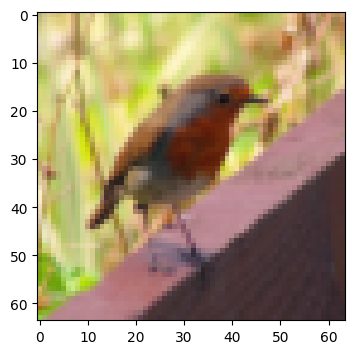

In [5]:
index = 10
plt.imshow(train_x_orig[index])
print("y= " + str(train_y[0,index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") +  " picture.")



In [6]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig size: " + str(test_x_orig.shape))
print("test_y size: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig size: (50, 64, 64, 3)
test_y size: (1, 50)


In [7]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [8]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    assert((n_h, n_x) == W1.shape)
    assert((n_h, 1) == b1.shape)
    assert((n_y, n_h) == W2.shape)
    assert((n_y, 1) == b2.shape)

    parameters={"W1" : W1,
                "b1" : b1,
                "W2" : W2,
                "b2" : b2}
    return parameters

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache=(linear_cache, activation_cache)
    return A, cache

def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -(np.dot(np.log(AL), Y.T) + np.dot(np.log(1 - AL), (1 - Y).T)) / (1.0 * m)

    cost = np.squeeze(cost)

    assert(cost.shape == ( ))
    return cost

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if(activation == "sigmoid"):
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif(activation == "relu"):
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for i in range(1, L + 1):
        parameters["W" + str(i)] -= learning_rate * grads["dW" + str(i)]
        parameters["b" + str(i)] -= learning_rate * grads["db" + str(i)]

    return parameters


In [9]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [10]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, parameters["W1"], parameters["b1"], activation="relu")
        A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="sigmoid")

        cost = compute_cost(A2, Y)

        dA2 = -(np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters = update_parameters(parameters, grads, learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i%100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i%100 == 0:
            costs.append(cost)

    if not(print_cost):
        print("The final cost = %f" %(cost))



    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate = "+str(learning_rate))
    plt.show()

    return parameters

 

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.33942815383664116
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130175
Cost after iteration 1300: 0.24681768210614838
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556616
Cost after iteration 1600: 0.1708076297809783
Cost after iteration 1700: 0.1130652456216468
Cost after iteration 1800: 0.09629426845937143
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319081
Cost after iteration 2100: 0.0663074813

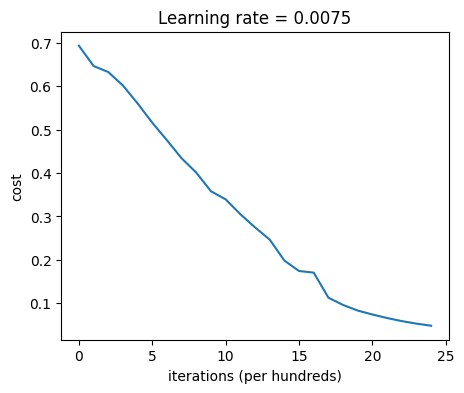

In [11]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x,n_h, n_y), num_iterations = 2500, print_cost=True)


2025-03-31 08:12:35.842441
The final cost = 0.638358


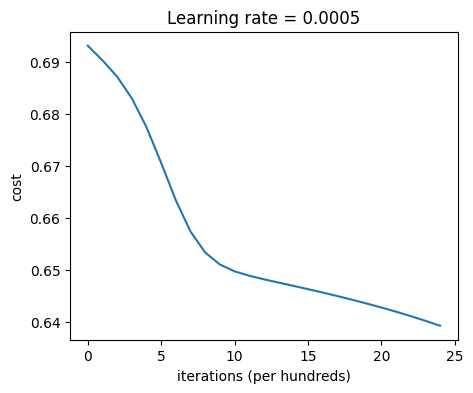

2025-03-31 08:19:57.166220
The final cost = 0.587800


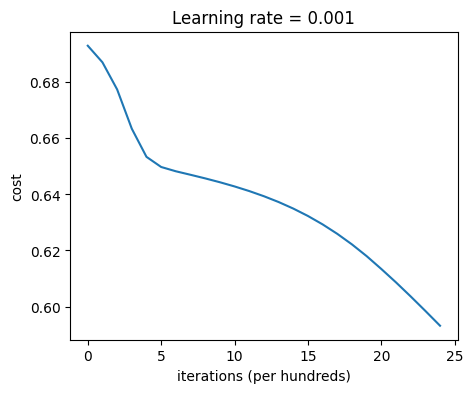

2025-03-31 08:27:51.361605
The final cost = 0.206029


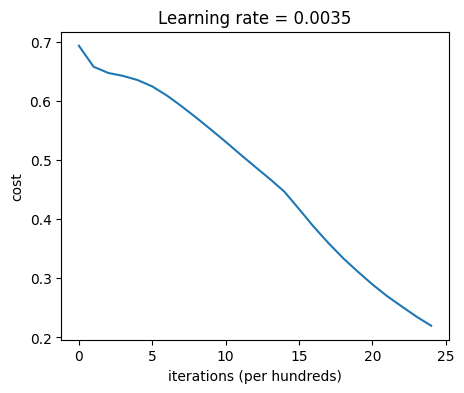

2025-03-31 08:37:12.227159
The final cost = 0.044215


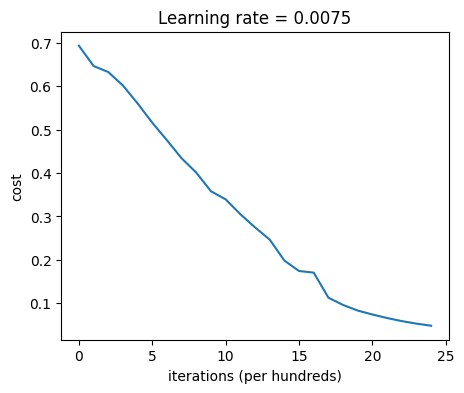

2025-03-31 08:50:52.381711
The final cost = 0.010385


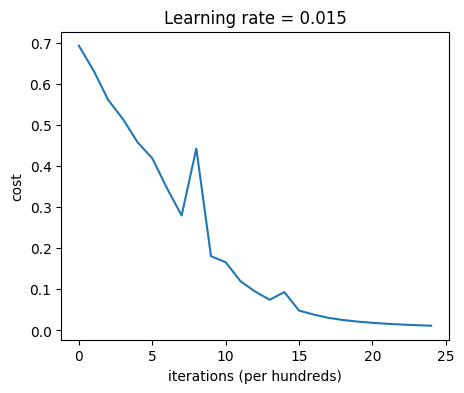

2025-03-31 09:10:56.327847
The final cost = 0.184010


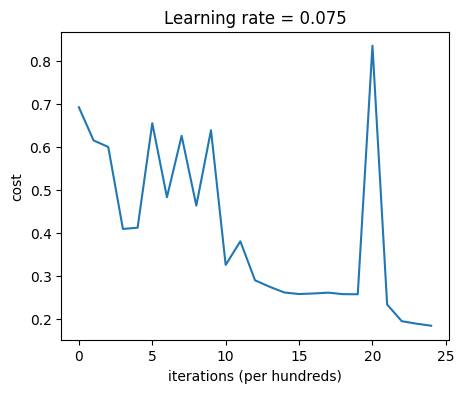

2025-03-31 13:26:18.786641
The final cost = 0.643974


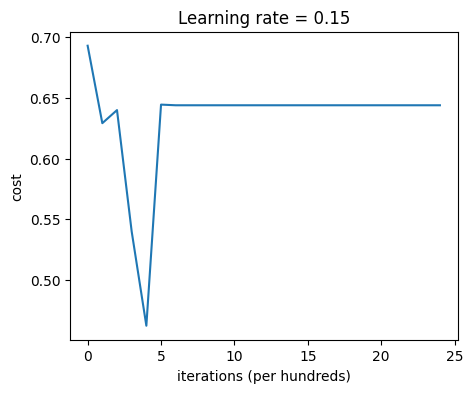

2025-03-31 13:35:22.237630


In [12]:
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0005, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0010, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0035, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0075, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0150, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.0750, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())
two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), learning_rate=0.1500, num_iterations=2500, print_cost=False)
print(datetime.datetime.now())

In [13]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    print("Accuracy: " + str(np.sum(p == y)/(1.0 * m)))
    return p


In [14]:
predictions_train = predict(train_x, train_y, parameters)


Accuracy: 1.0


In [15]:
prediction_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [16]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    
    for i in range(1, L):
        parameters["W"+ str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1]) / np.sqrt(layers_dims[i - 1])
        parameters["b" + str(i)] = np.zeros((layer_dims[i], 1))

        assert((layer_dims[i], layer_dims[i - 1]) == parameters["W" + str(i)].shape)
        assert((layer_dims[i], 1) == parameters["b" + str(i)].shape)

    return parameters

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for i in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], "relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1, X.shape[1]))
    

    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -(np.dot(np.log(AL), Y.T) + np.dot(np.log(1 - AL), (1 - Y).T)) / (m* 1.0)

    cost = np.squeeze(cost)
    assert(cost.shape == ( ))
    return cost

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")

    for i in reversed(range(L - 1)):
        current_cache = caches[i]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(i + 2)], current_cache, activation="relu")
        grads["dA" + str(i + 1)] = dA_prev_temp
        grads["dW" + str(i + 1)] = dW_temp
        grads["db" + str(i + 1)] = db_temp
        
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for i in range(1, L + 1):
        parameters["W" + str(i)] -= learning_rate * grads["dW" + str(i)]
        parameters["b" + str(i)] -= learning_rate * grads["db" + str(i)]
        
    return parameters



In [17]:
layers_dims = [12288, 20, 7, 5, 1]

In [18]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)

        cost = compute_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749


Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


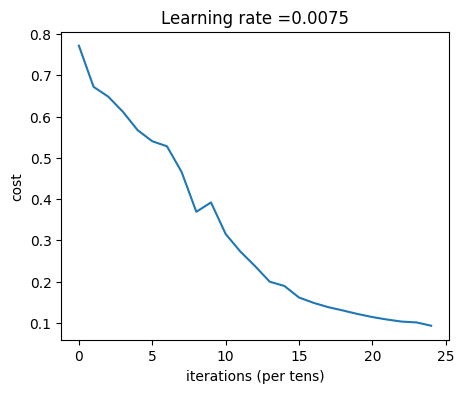

In [19]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [20]:
print(parameters)

{'W1': array([[ 0.01672799, -0.00641608, -0.00338875, ..., -0.00685887,
        -0.00593783,  0.01060475],
       [ 0.01395808,  0.00407498, -0.0049068 , ...,  0.01317046,
         0.00221326,  0.00930175],
       [-0.00123843, -0.00597204,  0.00472214, ...,  0.00101904,
        -0.00862638, -0.00505112],
       ...,
       [ 0.00140823, -0.00137711,  0.0163992 , ..., -0.00846451,
        -0.00761603, -0.00149162],
       [-0.00168698, -0.00618577, -0.01023935, ...,  0.02050705,
        -0.00428185,  0.00149319],
       [-0.01770891, -0.0067836 ,  0.00756873, ...,  0.01730701,
         0.01297081, -0.00322241]], shape=(20, 12288)), 'b1': array([[ 3.85542520e-03],
       [ 8.18087056e-03],
       [ 6.52138546e-03],
       [ 2.85633678e-03],
       [ 6.01081275e-03],
       [ 8.17122684e-04],
       [ 3.72986493e-04],
       [ 7.05992009e-04],
       [ 4.36344692e-04],
       [ 1.90827285e-03],
       [-6.51686461e-03],
       [ 6.97258125e-03],
       [-1.08988113e-03],
       [ 5.40858

In [21]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143541


In [22]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


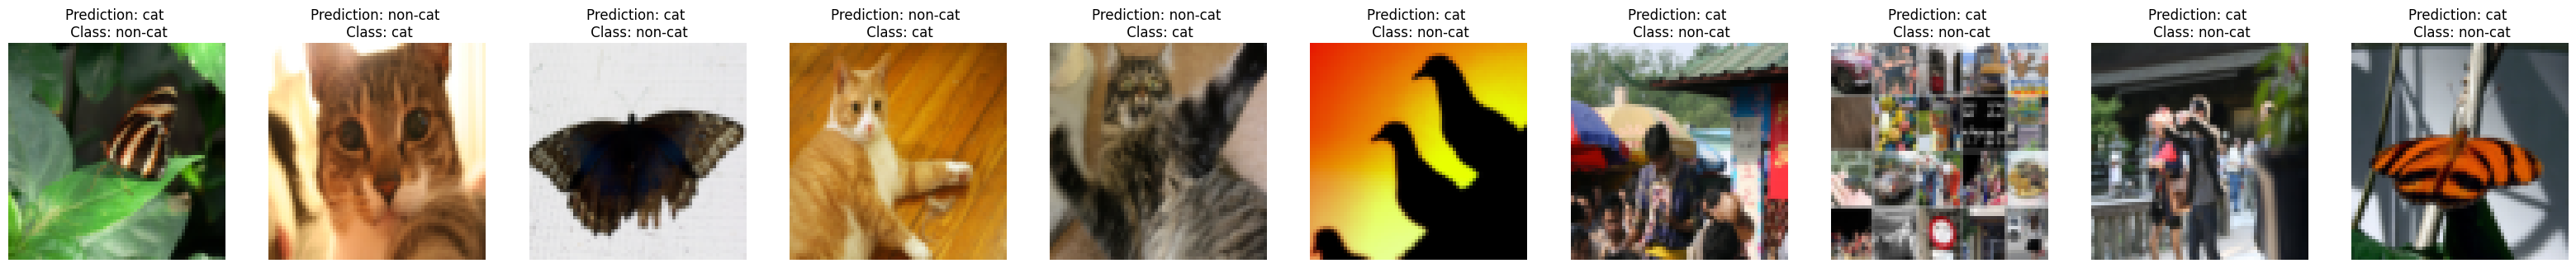

In [23]:
print_mislabeled_images(classes, test_x, test_y, pred_test)


In [24]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    print("Accuracy: " + str(np.sum(p == y)/(1.0 * m)))
    return p

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


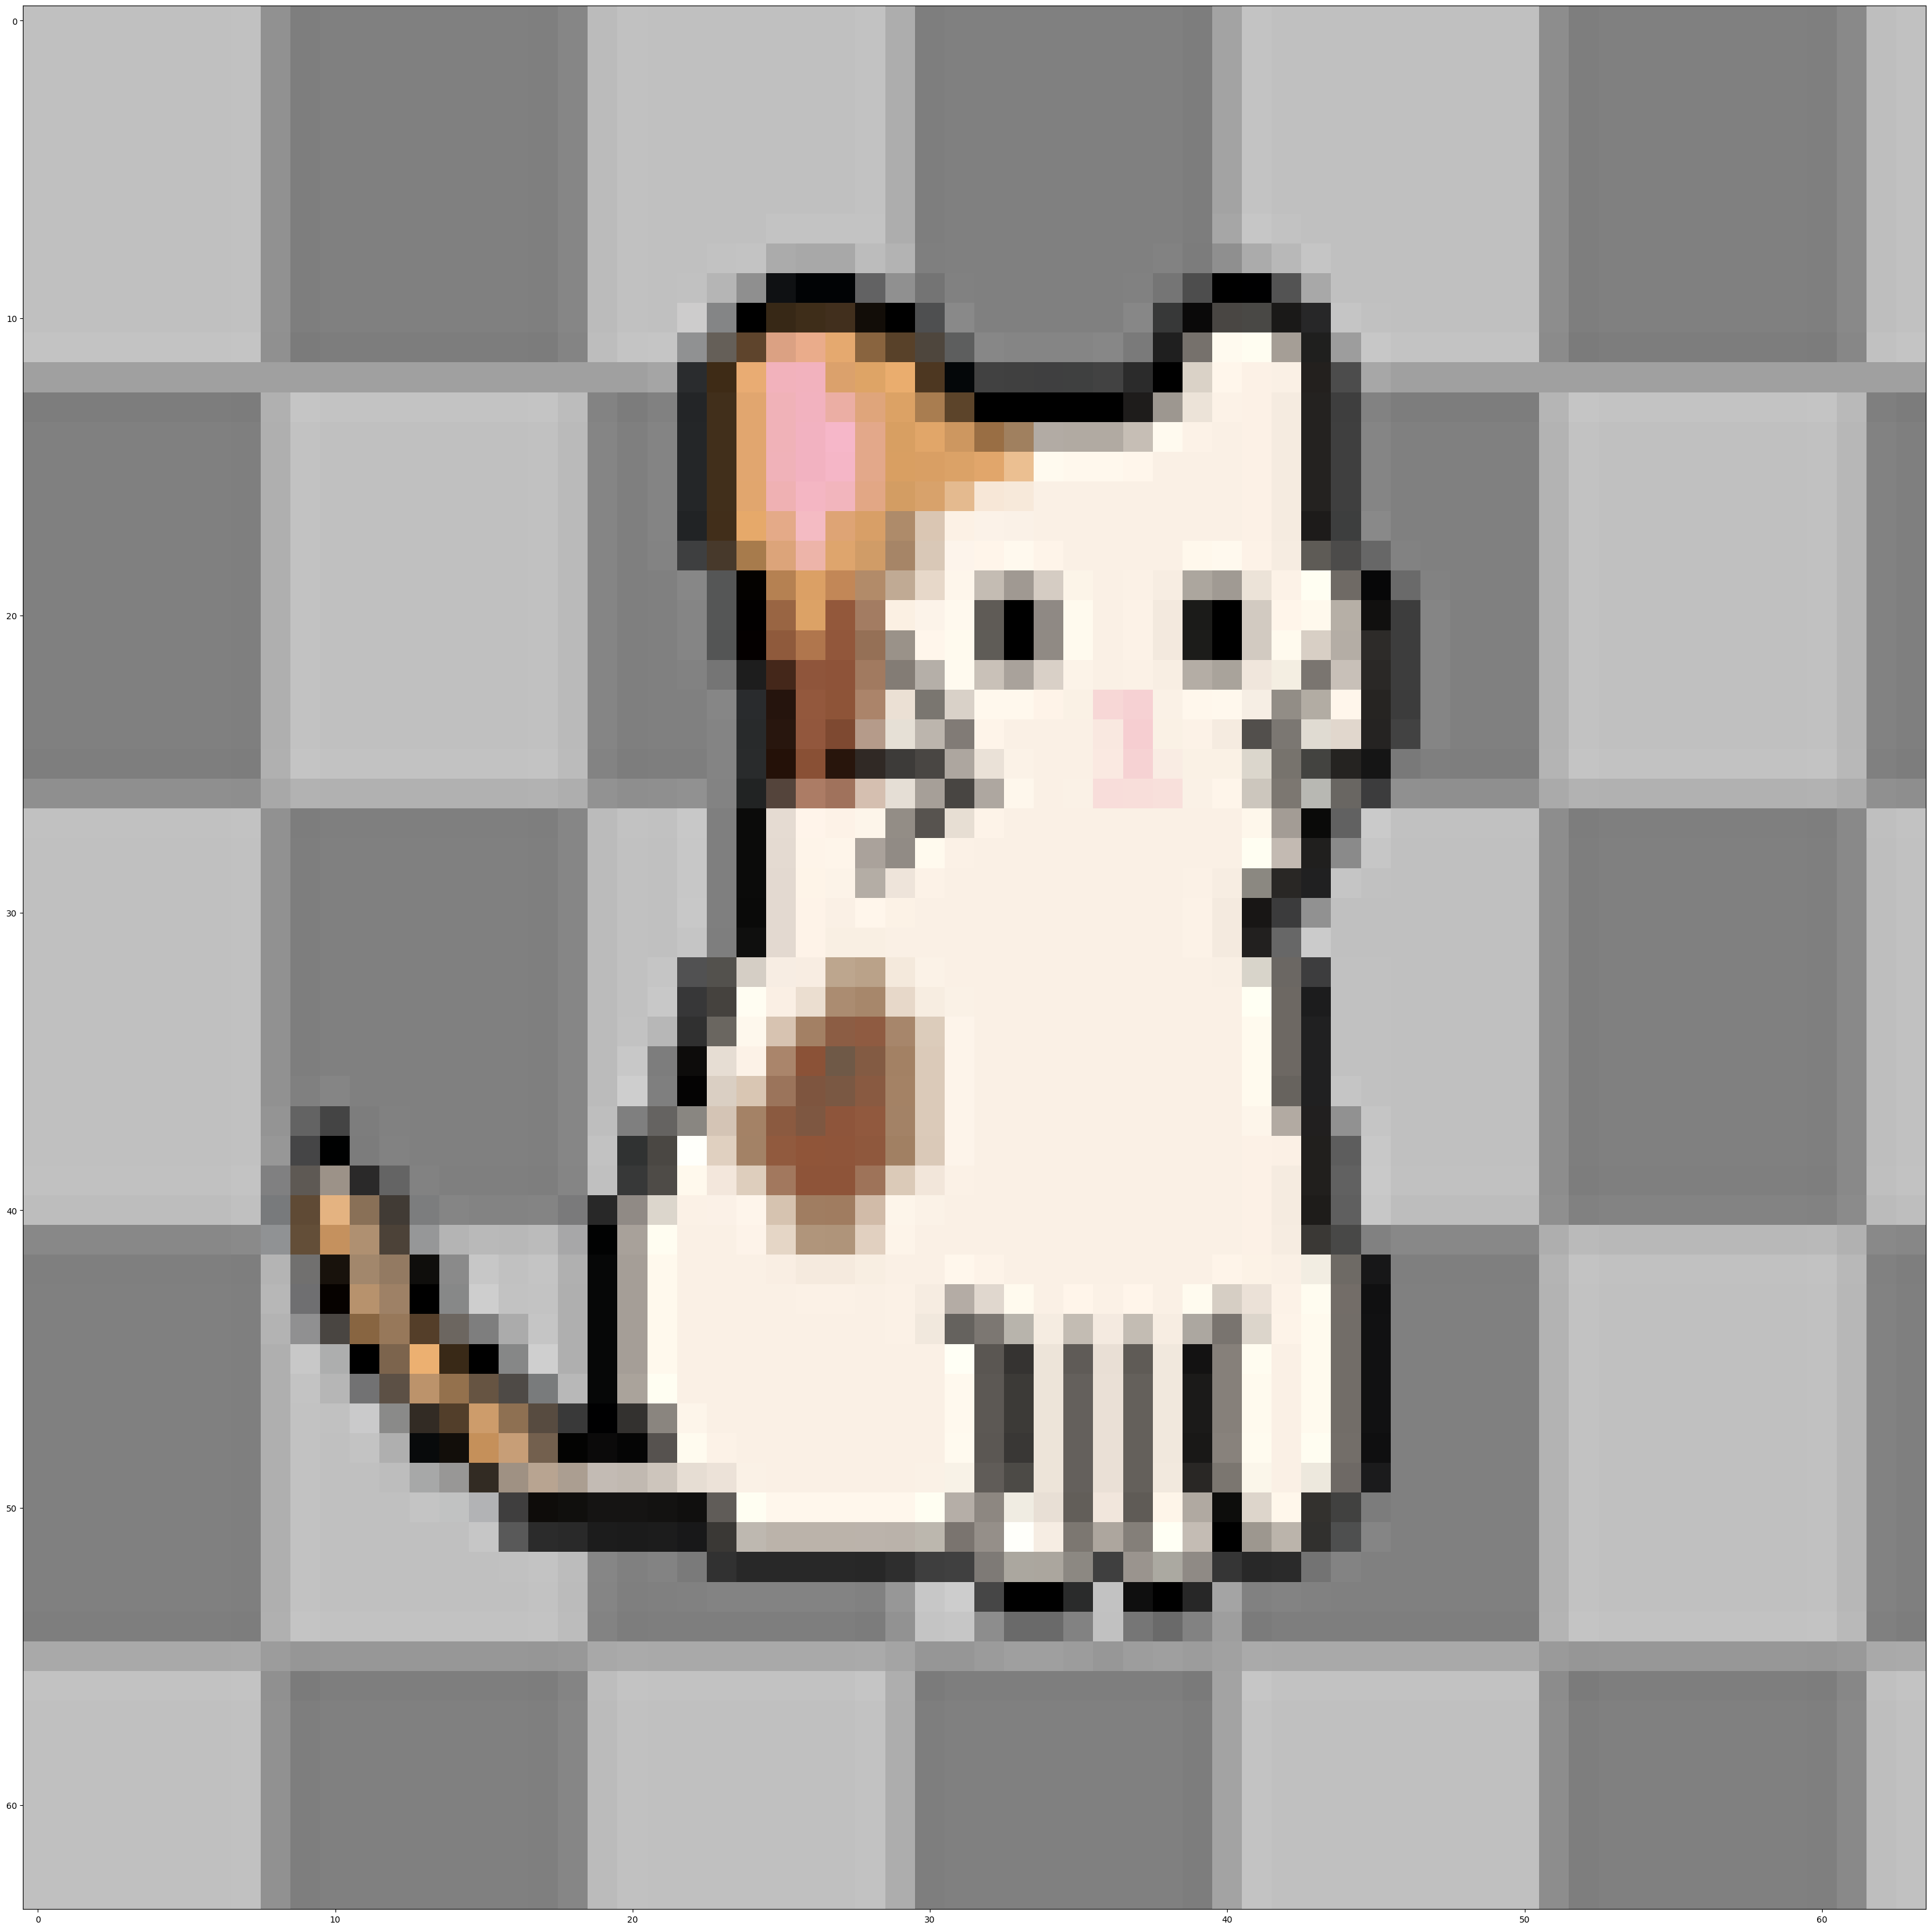

In [27]:

from PIL import Image


my_image = "cutie.png" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##
num_px = 64
image = Image.open("images/" + my_image)

image = image.convert("RGB")

image = image.resize((num_px, num_px))
my_image = np.array(image).reshape((num_px*num_px*3, 1)) / 255


my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

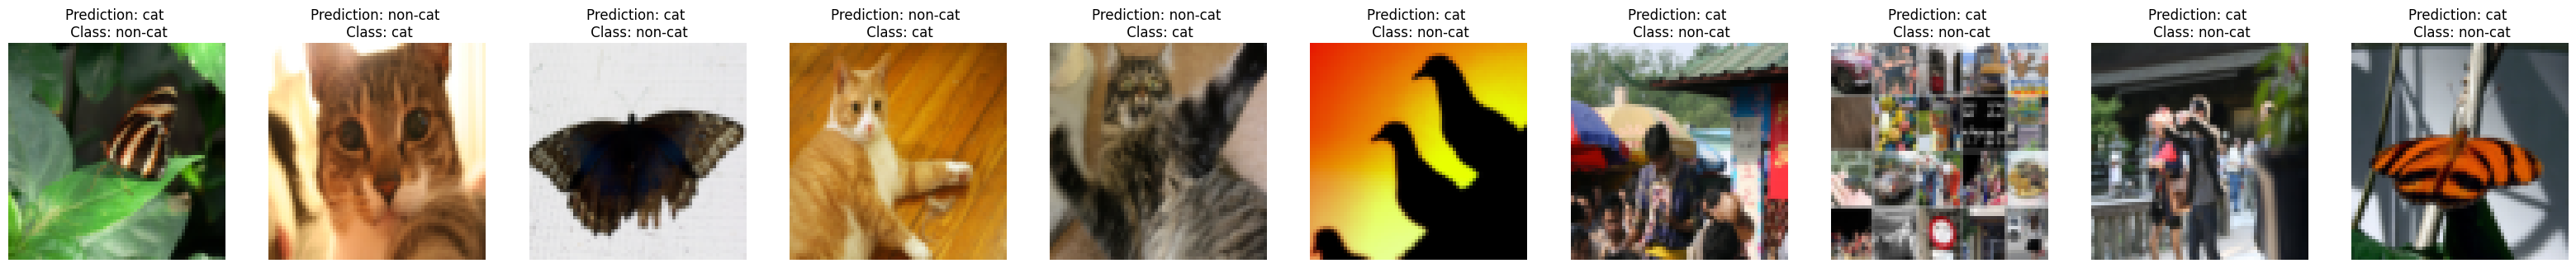

In [26]:
print_mislabeled_images(classes, test_x, test_y, pred_test)